In [37]:
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from tsseg.utils import *
from tsseg.omslr import *
from tsseg.greed import *

import pymongo

myclient = pymongo.MongoClient("mongodb://localhost:27017/")

%load_ext autoreload
%autoreload 2

db = myclient['TSE-DB']
#------------------- read the raw price panel------------------##
collection = db['raw_price_panel']
price_data = pd.DataFrame(collection.find({})).drop(columns = ['_id'])\
    .set_index('J-Date').astype(np.float32)

df = price_data["ذوب"].dropna()[-500:].copy(deep=True)

# df = pd.read_parquet("D:\Documents-C\BTCUSD_1 Min_Ask_2017.05.08_2023.03.22.parquet")
# df = df.iloc[:300, 1]


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
x = df.to_list()
sigma_iter, b_mat, a_mat = iter_sigma(x)
# print(sigma_iter)

In [43]:
gamma, rho = omslr_gmse(x, sigma=sigma_iter, max_k=10)

In [44]:
pvt_points = get_pivots(gamma=gamma)

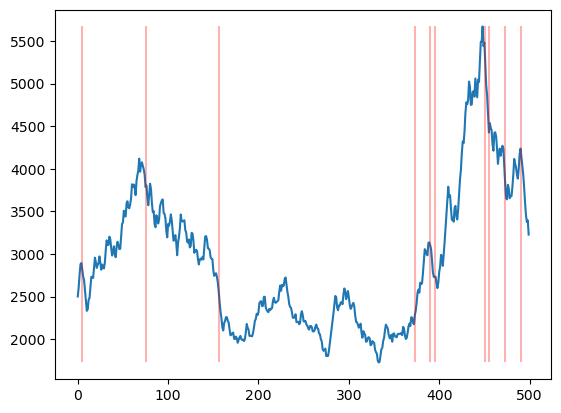

In [45]:
fig, ax = plt.subplots()
ax.plot(x)
ax.vlines(x=pvt_points, ymin=min(x), ymax=max(x), color="r", alpha=.3)
plt.show()